# Non Graded Challenge 12
- Muhammad Nafisa Fakhri
- FTDS Batch 013

- Lakukan hypothesis testing terhadap dataset yang diberikan.
- Ambil kesimpulan dari hasil analisa.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.set_option("display.max.columns", None)

In [2]:
data_mentah = pd.read_csv("covid_19_indonesia_time_series_all.csv")
data_mentah

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,-22,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,-20,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.00,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,-1,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,-18,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,12/2/2021,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,93,Province,NaN,Sulawesi Utara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,11,4.0,171,332.0,1507.0,13892,2641884,190.17,124.521240,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%,NaN,1.0
21755,12/2/2021,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,92,Province,NaN,Sumatera Barat,Indonesia,Asia,Sumatera,UTC+07:00,NaN,12,7.0,179,230.0,928.0,42013,5519245,131.37,100.465062,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%,4.00,1.0
21756,12/2/2021,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,36,Province,NaN,Sumatera Selatan,Indonesia,Asia,Sumatera,UTC+07:00,NaN,13,4.0,241,387.0,2853.0,91592,8217551,89.72,104.169465,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,4.00,1.0
21757,12/2/2021,ID-SU,Sumatera Utara,4,0,1,3,106045,2889,103061,95,Province,NaN,Sumatera Utara,Indonesia,Asia,Sumatera,UTC+07:00,NaN,25,8.0,450,693.0,5417.0,72981,14874889,203.82,99.051964,2.191894,0.27,7129.13,0.00,194.22,19.42,2.72%,97.19%,1.00,1.0


In [3]:
data_mentah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [4]:
data_mentah.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,21759.000000,21759.000000,21759.000000,21759.000000,2.175900e+04,21759.000000,2.175900e+04,21759.000000,0.0,21759.000000,21145.000000,21759.000000,21142.000000,21117.000000,2.175900e+04,2.175900e+04,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,20572.000000,19292.000000
mean,391.293580,13.220415,377.310998,0.762167,8.525997e+04,2648.289352,7.671260e+04,5899.079002,NaN,24.160256,5.872499,420.444368,508.740517,4490.348298,1.112418e+05,1.547817e+07,744.989784,113.680803,-2.731868,29.393033,6183.650588,0.852727,163.542156,16.354192,1.395671,1.074145
std,2074.551043,76.482617,1999.062563,937.213509,3.685133e+05,11776.011067,3.403957e+05,27518.102431,NaN,68.708265,16.471412,1199.018696,1429.127644,12647.556247,3.203746e+05,4.483574e+07,2743.209719,9.857587,3.608264,69.941090,10288.123342,2.277310,254.195761,25.419595,3.080207,1.578502
min,0.000000,0.000000,0.000000,-25725.000000,1.000000e+00,0.000000,0.000000e+00,-2306.000000,NaN,1.000000,1.000000,44.000000,35.000000,275.000000,6.640000e+02,6.484070e+05,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,4.000000,-16.000000,1.822500e+03,50.000000,1.038500e+03,182.000000,NaN,7.000000,1.000000,103.000000,99.000000,928.000000,1.678700e+04,1.999539e+06,47.790000,106.109004,-6.204699,1.750000,415.915000,0.000000,10.880000,1.090000,0.650000,0.660000
50%,41.000000,1.000000,31.000000,0.000000,1.078000e+04,283.000000,8.745000e+03,919.000000,NaN,11.000000,2.000000,169.000000,175.000000,1591.000000,4.201300e+04,4.216171e+06,103.840000,113.417654,-2.461746,8.160000,2727.460000,0.180000,73.550000,7.350000,0.990000,1.000000
75%,151.000000,5.000000,143.000000,27.000000,3.646450e+04,1050.000000,3.293250e+04,2607.500000,NaN,18.000000,4.000000,289.000000,332.000000,2853.000000,7.546800e+04,9.095591e+06,262.700000,121.201093,0.212037,26.260000,7374.120000,0.750000,195.850000,19.585000,1.330000,1.000000
max,56757.000000,2069.000000,48832.000000,36726.000000,4.257243e+06,143858.000000,4.105680e+06,574135.000000,NaN,416.000000,98.000000,7230.000000,8488.000000,74953.000000,1.916907e+06,2.651855e+08,16334.310000,138.696030,4.225615,1348.130000,79663.790000,63.800000,1533.980000,153.400000,175.000000,134.500000


In [5]:
data_mentah.select_dtypes(include="number").columns

Index(['New Cases', 'New Deaths', 'New Recovered', 'New Active Cases',
       'Total Cases', 'Total Deaths', 'Total Recovered', 'Total Active Cases',
       'City or Regency', 'Total Regencies', 'Total Cities', 'Total Districts',
       'Total Urban Villages', 'Total Rural Villages', 'Area (km2)',
       'Population', 'Population Density', 'Longitude', 'Latitude',
       'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million',
       'Total Deaths per 100rb', 'Growth Factor of New Cases',
       'Growth Factor of New Deaths'],
      dtype='object')

In [6]:
khi2,p_value = stats.jarque_bera(data_mentah["Total Cases"]) # Data tidak normal
print(khi2)
print(p_value)
print(type(p_value))
print(type(khi2))

7308850.736817716
0.0
<class 'numpy.float64'>
<class 'numpy.float64'>


In [7]:
data_total_kasus = data_mentah["Total Cases"]
data_total_mati = data_mentah["Total Deaths"]
data_total_sembuh = data_mentah["Total Recovered"]
data_total_aktif_kasus = data_mentah["Total Active Cases"]

rata2_total_kasus = np.round(data_total_kasus.mean())
rata2_total_mati = np.round(data_total_mati.mean())
rata2_total_sembuh = np.round(data_total_sembuh.mean())
rata2_total_aktif_kasus = np.round(data_total_aktif_kasus.mean())

std_total_kasus = data_total_kasus.std()
std_total_mati = data_total_kasus.std()
std_total_sembuh = data_total_sembuh.std()
std_total_aktif_kasus = data_total_aktif_kasus.std()

### Pengujian Hipotesis Menggunakan Single Sample
Pengujian ini dilakukan terdapat data covid pada "Total Cases". Para rakyat percaya bahwa rata-rata total kasus yang terjadi di 
indonesia adalah tidak lebih dari 90,000. Sadangkan saya percaya bahwa rata-rata total kasus covid tersebut lebih dari 90,000. 
Asumsikan bahwa nilai significant level adalah 5%

Notasi Hipotesis: 

**H0: μ <= 90000**

**H1: μ > 90000**

Nilai P Adalah: 0.028897527867097976
Nilai t Hitung adalah: -1.8973494761404177
Nilai Alfa Adalah: 0.05
Nilai t tabel adalah: -1.6449236625440058
Nilai dari confidence interval adalah: (-637012.7680893522, 807532.7680893522)
Nilai Alfa lebih kecil dari Nilai P
Cukup alasan untuk menolak H0


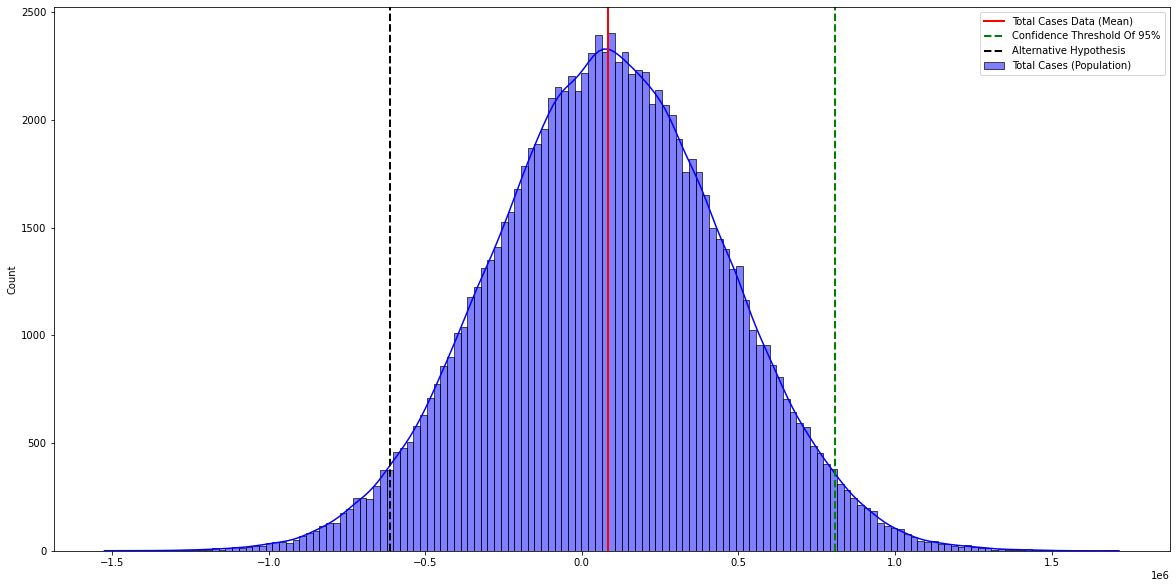

In [8]:
nilai_h0 = 90000
alfa = 0.05
degree_of_freedom = data_mentah["Total Cases"].count() - 1

nilai_t,nilai_p = stats.ttest_1samp(data_total_kasus,nilai_h0)
nilai_p_onesided = nilai_p/2
nilai_t_tabel = stats.t.ppf(q=alfa,df=degree_of_freedom)
print("Nilai P Adalah:",nilai_p_onesided)
print("Nilai t Hitung adalah:",nilai_t)
print("Nilai Alfa Adalah:",alfa)
print("Nilai t tabel adalah:", nilai_t_tabel)

populasi_total_kasus = np.random.normal(rata2_total_kasus,std_total_kasus,100000)
rata2_populasi_total = populasi_total_kasus.mean()
std_populasi_total = populasi_total_kasus.std()
nilai_confidence_interval = stats.norm.interval(0.95,rata2_total_kasus,std_total_kasus)
print("Nilai dari confidence interval adalah:",nilai_confidence_interval)

if nilai_p_onesided < alfa:
    print("Nilai Alfa lebih kecil dari Nilai P")
    print("Cukup alasan untuk menolak H0")
else:
    print("Nilai Alfa lebih besar dari Nilai P")
    print("Cukup alasan untuk tidak menolak H0")

plt.figure(figsize=(20,10))
sns.histplot(populasi_total_kasus,kde=True,label="Total Cases (Population)",color="blue")
plt.axvline(rata2_total_kasus,color="red",linewidth=2,label="Total Cases Data (Mean)")
plt.axvline(nilai_confidence_interval[1],color="green",linestyle="dashed",linewidth=2,label="Confidence Threshold Of 95%")
plt.axvline(rata2_populasi_total+nilai_t*std_populasi_total,color="black",linestyle="dashed",linewidth=2,label="Alternative Hypothesis")
plt.legend()

### Pengujian Hipotesis Menggunakan One Sample Two Tailed
Pengujian ini dilakukan terdapat data covid pada "Total Cases". Para rakyat percaya bahwa rata-rata total kasus yang terjadi di 
indonesia adalah 90,000. Sadangkan saya percaya bahwa rata-rata total kasus covid tersebut bukan 90,000. Asumsikan bahwa nilai significant level adalah 5%.

Notasi Hipotesis: 

**H0: μ = 90000**

**H1: μ != 90000**

Nilai P Adalah: 0.05779505573419595
Nilai t Hitung adalah: -1.8973494761404177
Nilai Alfa Adalah: 0.05
Nilai Alfa lebih besar dari Nilai P
Cukup alasan untuk menolak H0


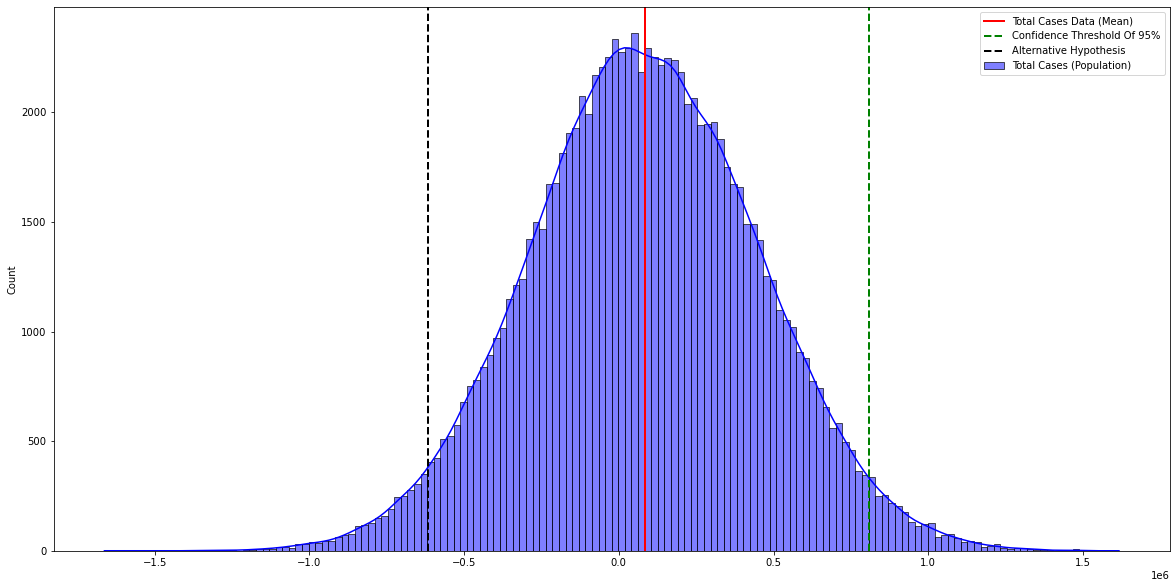

In [9]:
nilai_h0 = 90000
alfa = 0.05

nilai_t,nilai_p = stats.ttest_1samp(data_total_kasus, nilai_h0)
print("Nilai P Adalah:",nilai_p)
print("Nilai t Hitung adalah:",nilai_t)
print("Nilai Alfa Adalah:",alfa)

populasi_total_kasus = np.random.normal(rata2_total_kasus,std_total_kasus,100000)
rata2_populasi_total = populasi_total_kasus.mean()
std_populasi_total = populasi_total_kasus.std()
nilai_ci = stats.norm.interval(0.95,rata2_total_kasus,std_total_kasus)

if nilai_p > alfa:
    print("Nilai Alfa lebih besar dari Nilai P")
    print("Cukup alasan untuk menolak H0")
else:
    print("Nilai Alfa lebih kecil dari Nilai P")
    print("Cukup alasan untuk gagal menolak H0")

plt.figure(figsize=(20,10))
sns.histplot(populasi_total_kasus,kde=True,label="Total Cases (Population)",color="blue")
plt.axvline(rata2_total_kasus,color="red",linewidth=2,label="Total Cases Data (Mean)")
plt.axvline(nilai_ci[1],color="green",linestyle="dashed",linewidth=2,label="Confidence Threshold Of 95%")
plt.axvline(rata2_populasi_total+(nilai_t*std_populasi_total),color="black",linestyle="dashed",linewidth=2,label="Alternative Hypothesis")
plt.legend()